In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load dataset

In [2]:
df = pd.read_csv("Pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.shape

(800, 13)

In [5]:
df["Legendary"].value_counts()

Legendary
False    735
True      65
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df['Type 2'].fillna(df['Type 2'].mode()[0],inplace=True)

In [8]:
df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [9]:
df = df.drop(columns="#",axis=1)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


In [11]:
df['Name'].unique().shape

(800,)

In [12]:
df.corr(numeric_only=True,method='pearson')

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


<Axes: >

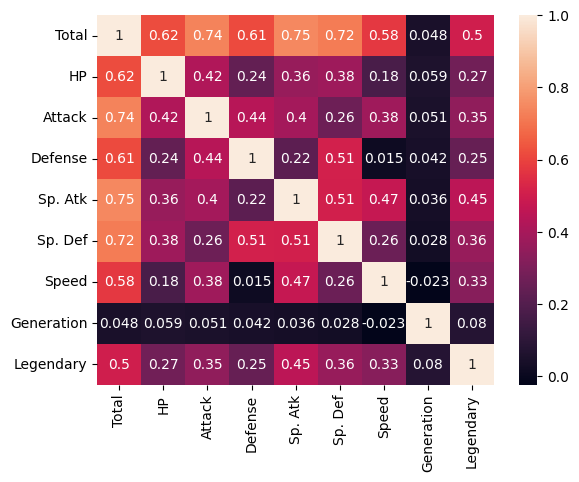

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<ipython-input-15-17a229ff1714>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Legendary'],palette="cool")


<Axes: xlabel='Legendary', ylabel='count'>

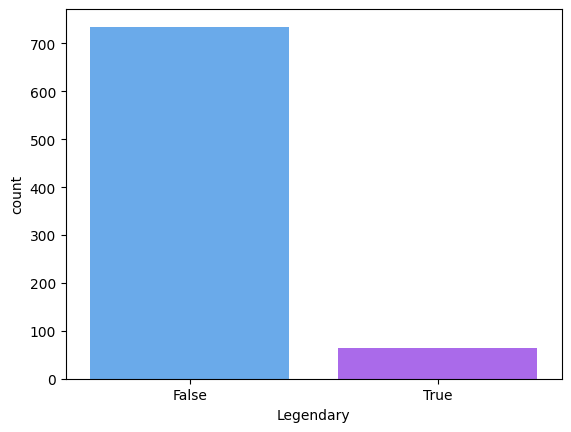

In [15]:
sns.countplot(x=df['Legendary'],palette="cool")

In [23]:
df = pd.get_dummies(df)

In [24]:
x = df.drop('Legendary',axis=True)
y = df['Legendary']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = clf.predict(x_test)
y_pred[:5]

array([ True, False, False, False, False])

In [38]:
y_test[:5]

696    False
667    False
63     False
533    False
66     False
Name: Legendary, dtype: bool

In [39]:
y_pred_proba = clf.predict_proba(x_test)

In [57]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,make_scorer

In [49]:
y_pred = y_pred.astype(int)

In [50]:
acc = accuracy_score(y_test,y_pred)
acc

0.95625

In [52]:
mse = mean_squared_error(y_test,y_pred)
mse

0.04375

In [56]:
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

0.2091650066335189

In [53]:
r2 = r2_score(y_test,y_pred)

In [54]:
r2

0.2533333333333333

### Hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV

In [ ]:
dtree_tuned = DecisionTreeClassifier(random_state=1)

parameters = {'max_depth': list(np.arange(2,20)) + [None],
              'min_samples_leaf': [1, 3, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

In [ ]:
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)